# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "/home/hjorth/HBP/DELME/networks/pd0_1k_swap"
updated_network = "/home/hjorth/HBP/DELME/networks/pd2_1k_swap"
output_network =  "/home/hjorth/HBP/DELME/networks/pd2_output_network"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2"

# original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD0"
# updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD2"

In [2]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir)

Loading 999 neurons with 275073 synapses and 32 gap junctions
Loading 999 neurons with 110435 synapses and 37 gap junctions


In [3]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()
swap.close()

Writing new network to /home/hjorth/HBP/DELME/networks/pd2_output_network/network-synapses.hdf5
275073 / 275073
Processing neuron 0
No axon for neuron ChIN_0 (74)
Processing neuron 100
Processing neuron 200
No axon for neuron ChIN_0 (244)
Processing neuron 300
No axon for neuron LTS_0 (315)
No axon for neuron ChIN_0 (336)
No axon for neuron ChIN_0 (361)
No axon for neuron LTS_5 (369)
Processing neuron 400
No axon for neuron LTS_3 (421)
No axon for neuron ChIN_0 (443)
No axon for neuron ChIN_0 (456)
Processing neuron 500
No axon for neuron LTS_7 (526)
No axon for neuron LTS_1 (576)
Processing neuron 600
No axon for neuron ChIN_0 (619)
Processing neuron 700
Processing neuron 800
No axon for neuron ChIN_0 (881)
Processing neuron 900
No axon for neuron ChIN_0 (936)
No axon for neuron LTS_4 (937)
No axon for neuron ChIN_0 (969)
No axon for neuron ChIN_0 (970)
No axon for neuron LTS_2 (998)
Running post degeneration pruning of synapses
149457 / 149457
Post pruning. Keeping 96390/149457 (64.4

In [4]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

Fri Sep  9 12:50:30 2022    whysoslow.profile

         25868027 function calls (25445919 primitive calls) in 35.355 seconds

   Ordered by: cumulative time
   List reduced from 315 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   35.355   35.355 {built-in method builtins.exec}
        1    0.000    0.000   35.355   35.355 <string>:1(<module>)
        1    0.138    0.138   35.355   35.355 swap_to_degenerated_morphologies.py:68(write_new_network_file)
        1    0.203    0.203   34.291   34.291 swap_to_degenerated_morphologies_extended.py:155(filter_synapses)
    83318    1.011    0.000   28.104    0.000 swap_to_degenerated_morphologies.py:269(filter_synapses_helper)
    83318    3.173    0.000   24.085    0.000 swap_to_degenerated_morphologies.py:299(filter_axonal_synapses_helper)
   185577    3.216    0.000    8.511    0.000 group.py:319(__getitem__)
   180569    1.447    0.000    7.676    0.000 da

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Loading 999 neurons with 275073 synapses and 32 gap junctions
Loading 999 neurons with 96390 synapses and 30 gap junctions
Figure written: /home/hjorth/HBP/DELME/networks/pd2_output_network/figures/input-to-1-dSPN_0-and-internal-synapses.png


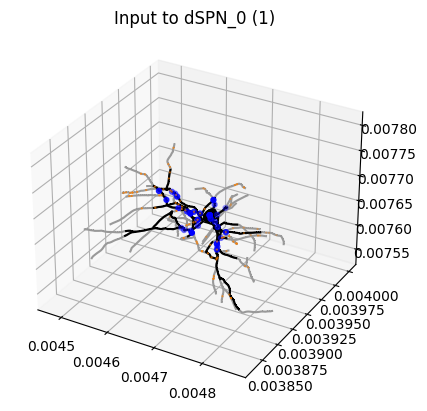

In [5]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)